## **背景描述**
某医院半年内的药品销售数据可视化

## **数据说明**
字段：购药时间、社保卡号、商品编码、商品名称、销售数量、应收金额、实收金额

| 字段 | 数据类型 |
| -------- | -------- | 
| 购药时间     | string     | 
| 社保卡号     | string     | 
| 商品编码     | string     | 
| 销售数量     | int     |
| 应收金额     | float     | 
| 实收金额     | float     | 

### 读取数据

In [1]:
import pandas as pd
import numpy as np
original_data = pd.read_excel('医院药品销售数据.xlsx')
original_data.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2016-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2016-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2016-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2016-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2016-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


### 评估与清洗数据

#### 评估数据整齐程度

In [2]:
cleaned = original_data.copy()
cleaned.sample(10)

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
2648,2016-07-05 星期二,1.329273e+07,861496.0,尼莫地平片,2.0,6.0,5.28
5671,2016-07-16 星期六,1.002982e+10,861507.0,苯磺酸氨氯地平片(安内真),2.0,19.0,17.00
2406,2016-01-05 星期二,1.000920e+10,861485.0,富马酸比索洛尔片(博苏),2.0,33.6,29.57
2060,2016-03-08 星期二,1.007020e+10,861459.0,吲达帕胺片(寿比山),1.0,15.0,13.50
6074,2016-05-05 星期四,1.007325e+10,861456.0,酒石酸美托洛尔片(倍他乐克),2.0,14.0,12.32
6420,2016-06-22 星期三,1.006566e+10,861397.0,氨加黄敏胶囊(请报77504),1.0,17.5,15.50
4268,2016-04-08 星期五,1.004859e+10,868218.0,坎地沙坦酯片(迪之雅),6.0,126.0,126.00
1640,2016-04-02 星期六,1.616528e+06,861456.0,酒石酸美托洛尔片(倍他乐克),2.0,14.0,14.00
1136,2016-03-20 星期日,1.001220e+10,861406.0,非洛地平缓释片(波依定),1.0,25.0,22.50
5611,2016-04-16 星期六,1.003132e+10,861507.0,苯磺酸氨氯地平片(安内真),2.0,21.0,13.60


数据整齐，符合一行是一个观察值，一列是一个变量，一个单元格是一个值的原则。

#### 评估缺失数据与数据类型

In [3]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6576 non-null   float64
 2   商品编码    6577 non-null   float64
 3   商品名称    6577 non-null   object 
 4   销售数量    6577 non-null   float64
 5   应收金额    6577 non-null   float64
 6   实收金额    6577 non-null   float64
dtypes: float64(5), object(2)
memory usage: 359.9+ KB


购药时间和社保卡号存在两个空缺值。商品编码、商品名称、销售数量、应收金额、实收金额存在一个空缺值。分别提取。

In [4]:
## 购药时间空缺值提取
cleaned[cleaned['购药时间'].isnull()]

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.0
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## 删除购药时间缺失的行
cleaned = cleaned.dropna(subset = '购药时间')
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6575 non-null   float64
 2   商品编码    6576 non-null   float64
 3   商品名称    6576 non-null   object 
 4   销售数量    6576 non-null   float64
 5   应收金额    6576 non-null   float64
 6   实收金额    6576 non-null   float64
dtypes: float64(5), object(2)
memory usage: 411.0+ KB


In [6]:
## 提取社保卡号空缺的行
cleaned[cleaned['社保卡号'].isnull()]

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6571,2016-04-25 星期二,NaN,2367011.0,高特灵,2.0,11.2,9.86


In [7]:
## 用000代替社保卡号为空的值
cleaned['社保卡号'] = cleaned['社保卡号'].fillna('000')
cleaned[cleaned['社保卡号'].isnull()]

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额


In [8]:
## 社保卡号、商品编码应为字符串类型，销售数量应为整数类型。
cleaned['社保卡号'] = cleaned['社保卡号'].astype('str')
cleaned['商品编码'] = cleaned['商品编码'].astype('str')
cleaned['销售数量'] = cleaned['销售数量'].astype('int')
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6576 non-null   object 
 2   商品编码    6576 non-null   object 
 3   商品名称    6576 non-null   object 
 4   销售数量    6576 non-null   int64  
 5   应收金额    6576 non-null   float64
 6   实收金额    6576 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 411.0+ KB


In [9]:
## 将购药时间拆分成两列
split_result = cleaned['购药时间'].str.split(' ',expand = True)
split_result.columns = ['购药日期','星期']
cleaned = pd.concat([cleaned, split_result], axis=1)
cleaned.drop('购药时间', axis=1, inplace=True)
cleaned.head()

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期
0,1616528.0,236701.0,强力VC银翘片,6,82.8,69.00,2016-01-01,星期五
1,1616528.0,236701.0,清热解毒口服液,1,28.0,24.64,2016-01-02,星期六
2,12602828.0,236701.0,感康,2,16.8,15.00,2016-01-06,星期三
3,10070343428.0,236701.0,三九感冒灵,1,28.0,28.00,2016-01-11,星期一
4,101554328.0,236701.0,三九感冒灵,8,224.0,208.00,2016-01-15,星期五


In [10]:
## 转化购药日期列的数据类型为日期
cleaned['购药日期'] = pd.to_datetime(cleaned['购药日期'])
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 0 to 6577
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   社保卡号    6576 non-null   object        
 1   商品编码    6576 non-null   object        
 2   商品名称    6576 non-null   object        
 3   销售数量    6576 non-null   int64         
 4   应收金额    6576 non-null   float64       
 5   实收金额    6576 non-null   float64       
 6   购药日期    6576 non-null   datetime64[ns]
 7   星期      6576 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 462.4+ KB


#### 评估重复数据

In [11]:
cleaned[cleaned.duplicated()]

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期


#### 评估不一致数据

In [12]:
with pd.option_context('display.max_rows', None):
    print(cleaned['商品名称'].value_counts())

商品名称
苯磺酸氨氯地平片(安内真)            899
开博通                      622
酒石酸美托洛尔片(倍他乐克)           551
硝苯地平片(心痛定)               424
苯磺酸氨氯地平片(络活喜)            321
复方利血平片(复方降压片)            306
G琥珀酸美托洛尔缓释片(倍他乐克)        196
非洛地平缓释片(波依定)             157
复方利血平氨苯蝶啶片(北京降压0号)       149
缬沙坦胶囊(代文)                146
高特灵                      126
吲达帕胺片(寿比山)               119
苯磺酸左旋氨氯地平片(施慧达)          118
x硝苯地平缓释片(伲福达)            113
感康                       108
厄贝沙坦氢氯噻嗪片(安博诺)           104
厄贝沙坦片(吉加)                 93
尼莫地平片                     90
厄贝沙坦片(安博维)                85
心痛定                       83
KG替米沙坦片(欧美宁)(6盒/疗程)       79
替米沙坦片(立文)                 73
清热解毒口服液                   73
G苯磺酸氨氯地平片(6盒/疗程)          72
珍菊降压片                     71
替米沙坦片(美卡素)                68
富马酸比索洛尔片(博苏)              66
复方罗布麻片                    65
阿司匹林                      64
富马酸比索洛尔片(康忻)              63
坎地沙坦酯片(必洛斯)               62
厄贝沙坦氢氯噻嗪片(依伦平)            58
氯沙坦钾氢氯噻嗪片(海捷亚)            56
尼群地平片                     49
盐酸普萘洛尔片(心

#### 评估无效或错误数据

In [13]:
cleaned.describe()

,销售数量,应收金额,实收金额,购药日期
count,6576.000000,6576.000000,6576.000000,6576
mean,2.385036,50.472962,46.316037,2016-04-10 11:07:00.437956096
min,-10.000000,-374.000000,-374.000000,2016-01-01 00:00:00
25%,1.000000,14.000000,12.320000,2016-02-23 00:00:00
50%,2.000000,28.000000,26.550000,2016-04-15 00:00:00
75%,2.000000,59.600000,53.000000,2016-05-27 00:00:00
max,50.000000,2950.000000,2650.000000,2016-07-19 00:00:00
std,2.373526,87.602559,80.982771,NaN


In [14]:
## 存在值为负数的数据，进行提取
cleaned[cleaned['销售数量'] < 0]

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期
61,11616528.0,236702.0,强力VC银翘片,-1,-13.8,-13.80,2016-05-02,星期一
100,11487628.0,236704.0,氨加黄敏胶囊,-1,-12.4,-11.00,2016-06-19,星期日
201,10012556628.0,236706.0,阿司匹林,-2,-93.6,-84.00,2016-02-24,星期三
271,1616528.0,236709.0,心痛定,-1,-44.8,-39.80,2016-01-31,星期日
444,10019172628.0,2367011.0,开博通,-2,-56.0,-49.28,2016-01-19,星期二
1268,10046703028.0,861409.0,非洛地平缓释片(波依定),-2,-65.0,-58.00,2016-06-14,星期二
1336,13493028.0,861435.0,缬沙坦胶囊(代文),-2,-83.6,-75.00,2016-01-24,星期日
1620,10082289228.0,861456.0,酒石酸美托洛尔片(倍他乐克),-1,-7.0,-6.30,2016-03-21,星期一
1674,10083778428.0,861456.0,酒石酸美托洛尔片(倍他乐克),-1,-7.0,-6.30,2016-04-14,星期四
2553,10052521128.0,861494.0,尼群地平片,-5,-8.5,-7.50,2016-02-18,星期四


In [15]:
## 将负值转化为正值
cleaned['销售数量'] = cleaned['销售数量'].abs()
cleaned['应收金额'] = cleaned['应收金额'].abs()
cleaned['实收金额'] = cleaned['实收金额'].abs()
cleaned[(cleaned['销售数量']<0) | (cleaned['应收金额']<0) | (cleaned['实收金额'] < 0)]

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期


### 保存清理后的数据

In [16]:
cleaned.to_csv('cleaned_医院药品销售数据.xlsx')

### 数据可视化

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

### 每日、每周、每月药品销售数量统计

#### 每日药品销售数量

In [43]:
## 新建列：购药日
cleaned['购药日'] = cleaned['购药日期'].dt.day
daily_amount_count = cleaned.groupby('购药日')['销售数量'].sum()
daily_amount_df = daily_amount_count.reset_index()
daily_amount_df.columns = ['购药日', '销售数量']
daily_amount_df

,购药日,销售数量
0,1,488
1,2,486
2,3,398
3,4,401
4,5,1505
5,6,388
6,7,371
7,8,379
8,9,340
9,10,356


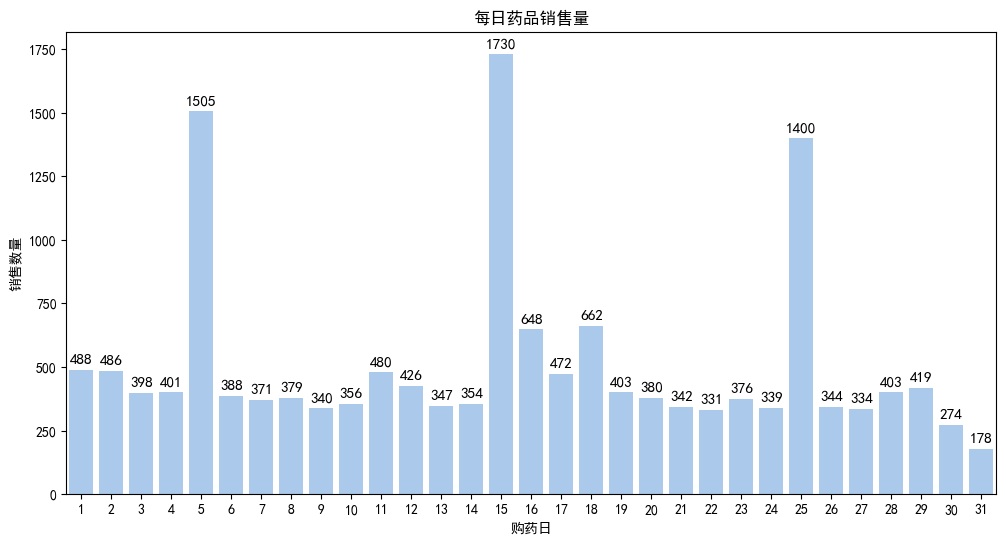

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(daily_amount_df,x = '购药日',y = '销售数量')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每日药品销售量')
plt.show()

每月的5号、15号和25号出现药品销售的高峰，药品销售量最大。

#### 每周药品销售数量

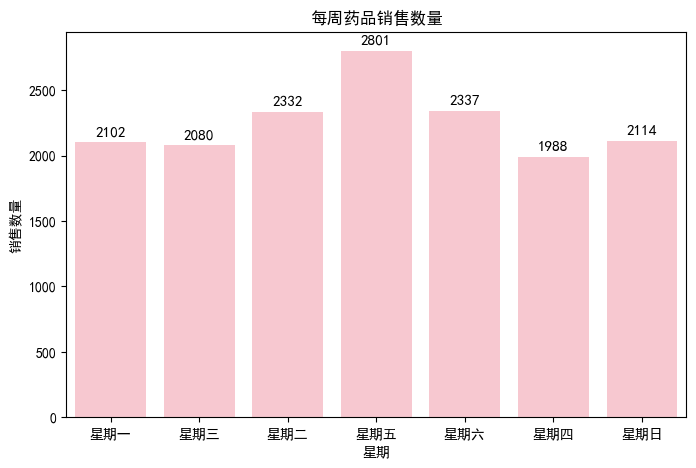

In [21]:
plt.figure(figsize = (8,5))
df_sell_amount = cleaned.groupby('星期')['销售数量'].sum()
df_sell_bar = df_sell_amount.reset_index()
ax = sns.barplot(df_sell_bar,x = '星期',y = '销售数量',color = 'pink')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每周药品销售数量')
plt.show()

一周中，销量最好日子在星期五，其次是星期六和星期二。星期四销量最差。

#### 每月药品销售量

In [45]:
## 新建列：购药月
cleaned['购药月'] = cleaned['购药日期'].dt.month
monthly_amount_count = cleaned.groupby('购药月')['销售数量'].sum()
monthly_amount_df = monthly_amount_count.reset_index()
monthly_amount_df

,购药月,销售数量
0,1,2536
1,2,1927
2,3,2226
3,4,3015
4,5,2236
5,6,2331
6,7,1483


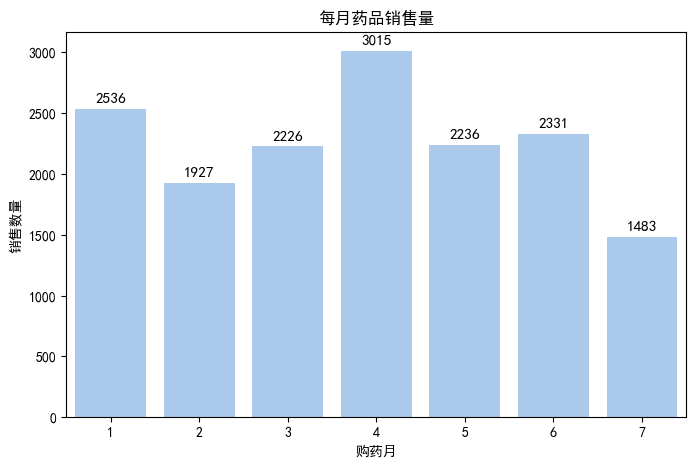

In [46]:
plt.figure(figsize = (8,5))
ax = sns.barplot(monthly_amount_df,x = '购药月',y = '销售数量')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每月药品销售量')
plt.show()

四月份药品销售量最多，七月最少。

### 每日、每周、每月购药人数统计

#### 每日购药人数

In [34]:
cleaned['购药日'] = cleaned['购药日期'].dt.day
daily_patient_count = cleaned.groupby('购药日')['社保卡号'].nunique()
daily_count_df = daily_patient_count.reset_index()
daily_count_df.columns = ['购药日', '购药人数']
daily_count_df

,购药日,购药人数
0,1,148
1,2,140
2,3,135
3,4,133
4,5,378
5,6,145
6,7,106
7,8,109
8,9,116
9,10,108


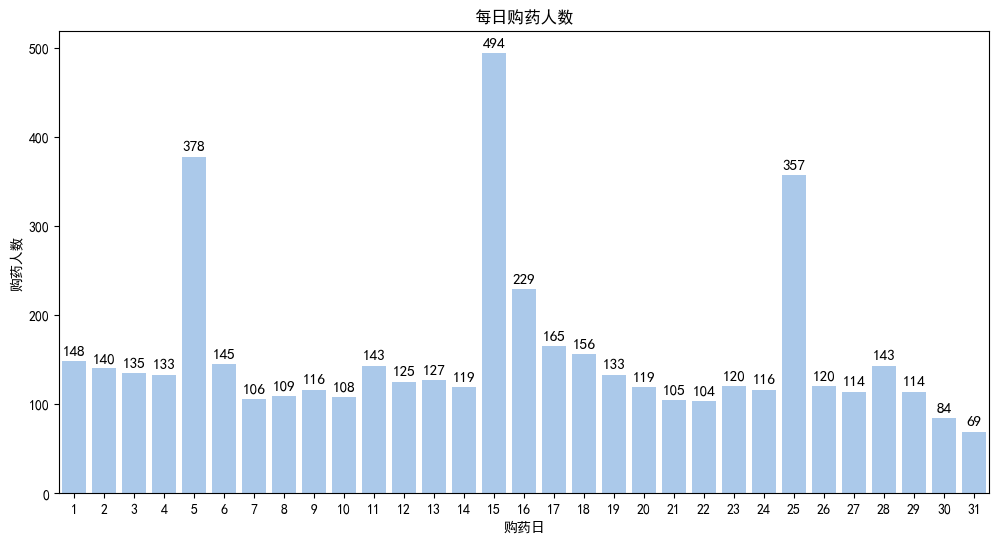

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(daily_count_df,x = '购药日',y = '购药人数')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每日购药人数')
plt.show()

一个月中，出现了三次购药高峰。分别是每月的5日、15日和25日。

#### 每周购药人数

In [37]:
weekly_count_df = cleaned.groupby('星期')['社保卡号'].nunique()
weekly_count_df

星期
星期一    575
星期三    595
星期二    649
星期五    756
星期六    669
星期四    502
星期日    574
Name: 社保卡号, dtype: int64

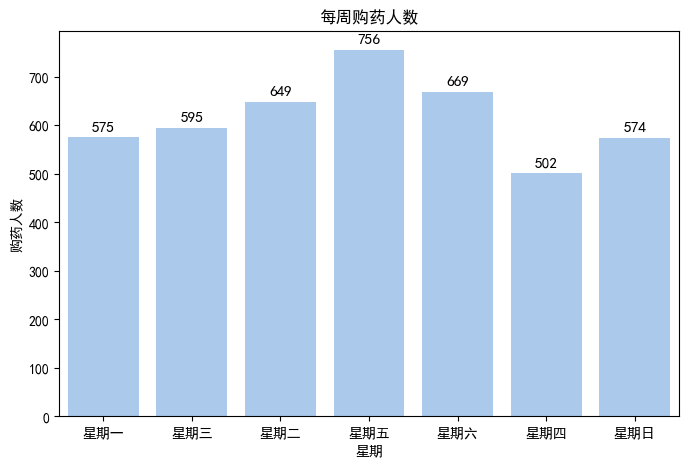

In [38]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = weekly_count_df.index,y =  weekly_count_df.values)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每周购药人数')
plt.ylabel('购药人数')
plt.show()

一周中，星期五购药人数最多，其次是星期六。星期四的购药人数最少。

#### 每月购药人数

In [39]:
cleaned['购药月'] = cleaned['购药日期'].dt.month
monthly_patient_count = cleaned.groupby('购药月')['社保卡号'].nunique()
monthly_count_df = monthly_patient_count.reset_index()
monthly_count_df.columns = ['购药月', '购药人数']
monthly_count_df

,购药月,购药人数
0,1,671
1,2,526
2,3,685
3,4,829
4,5,635
5,6,611
6,7,453


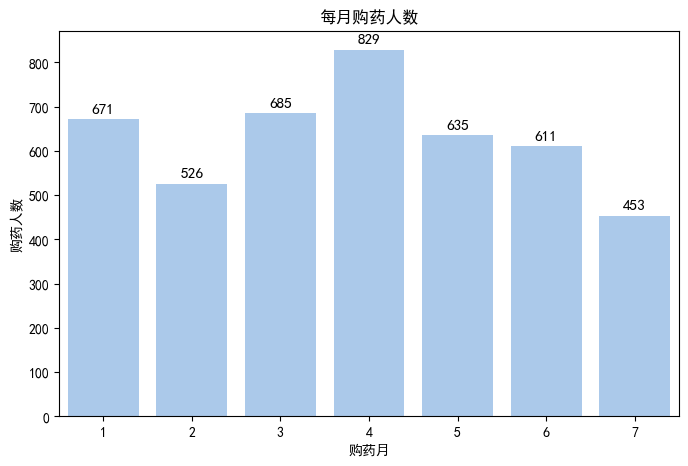

In [47]:
plt.figure(figsize = (8,5))
ax = sns.barplot(monthly_count_df,x = '购药月',y = '购药人数')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每月购药人数')
plt.show()

2018年1-7月中，4月出现了购药高峰，达829人在该月购药。2月和7月则是购药人数较少的月份。

### 每日、每周、每月实付金额统计

#### 每日实付金额

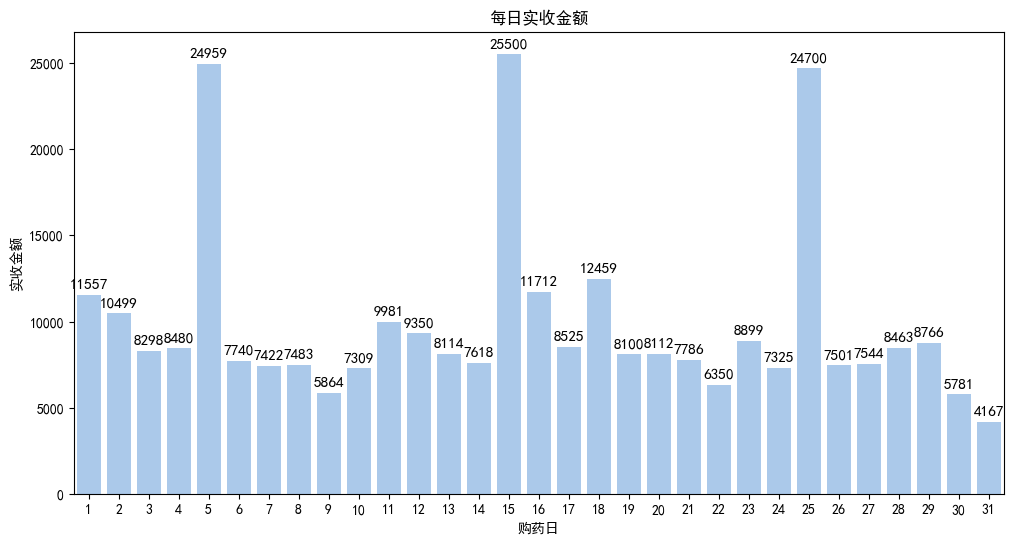

In [52]:
daily_paid = cleaned.groupby('购药日')['实收金额'].sum()
daily_paid_df = daily_paid.reset_index()
daily_paid_df.columns = ['购药日','实收金额']
plt.figure(figsize = (12,6))
ax = sns.barplot(daily_paid_df,x = '购药日',y = '实收金额')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每日实收金额')
plt.show()

每月的5号、15号、25号实收金额最高。与购药人数和药品销售数的规律基本一致。

#### 每周实收金额

In [54]:
weekly_paid = cleaned.groupby('星期')['实收金额'].sum()
weekly_paid_df = weekly_paid.reset_index()
weekly_paid_df

,星期,实收金额
0,星期一,40375.09
1,星期三,39157.64
2,星期二,44723.36
3,星期五,49817.87
4,星期六,48208.33
5,星期四,40393.88
6,星期日,43685.63


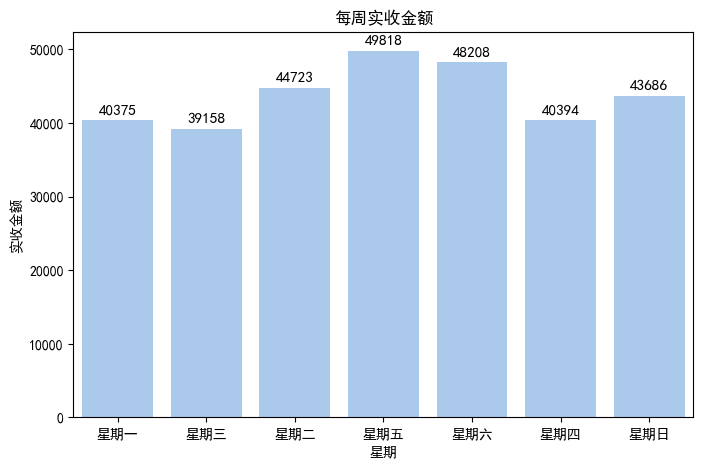

In [56]:
plt.figure(figsize = (8,5))
ax = sns.barplot(weekly_paid_df,x = '星期',y = '实收金额')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每周实收金额')
plt.show()

周五药品实收金额最高，周三最低。

#### 每月实收金额

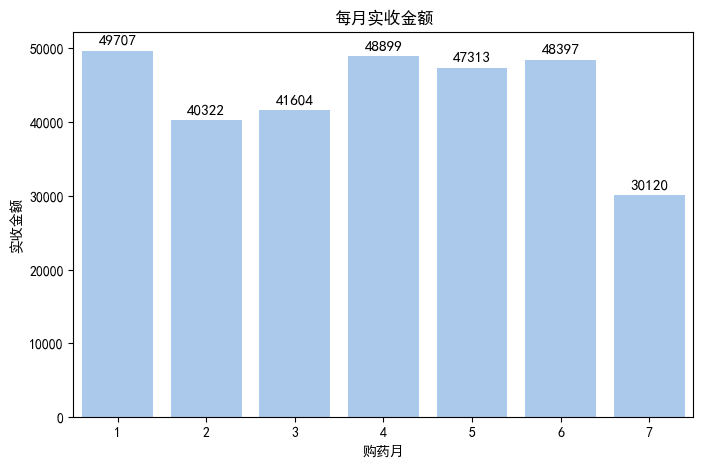

In [61]:
monthly_paid = cleaned.groupby('购药月')['实收金额'].sum()
monthly_paid_df = monthly_paid.reset_index()
monthly_paid_df.columns = ['购药月','实收金额']
plt.figure(figsize = (8,5))
ax = sns.barplot(monthly_paid_df,x = '购药月',y = '实收金额')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('每月实收金额')
plt.show()

一月实收金额最高，其次是四月。七月实收金额最低。

#### 药品销量前十榜单

In [25]:
df_1 = cleaned.groupby('商品名称')['销售数量'].sum()
df_1

商品名称
**盐酸阿罗洛尔片(阿尔马尔)    101
**阿替洛尔片             17
D厄贝沙坦氢氯噻嗪片(倍悦)       2
D替格瑞洛片              10
D盐酸贝尼地平片            33
                  ... 
非洛地平缓释片(康宝得维)       99
非洛地平缓释片(波依定)       379
马来酸依那普利片(怡那林)       28
马来酸左旋氨氯地平片(玄宁)      43
高特灵                376
Name: 销售数量, Length: 78, dtype: int64

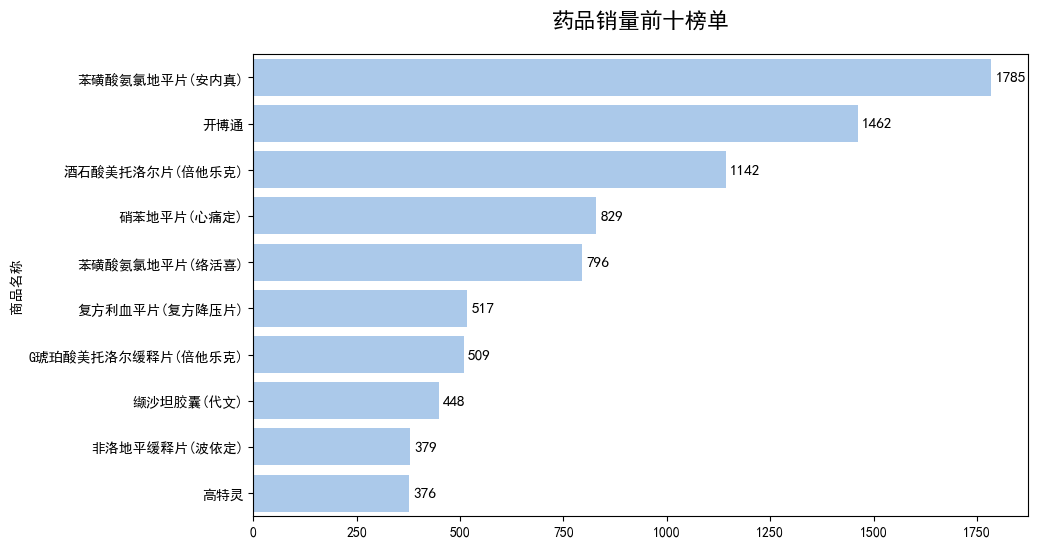

In [26]:
top_10_drugs = df_1.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_drugs.values,y=top_10_drugs.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('药品销量前十榜单', fontsize=16, pad=20)
plt.show()

#### 药品销售额前十榜单

In [27]:
cleaned['实际销售额'] = cleaned['实收金额']*cleaned['销售数量']
cleaned.head()

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期,购药日,购药月,实际销售额
0,1616528.0,236701.0,强力VC银翘片,6,82.8,69.00,2016-01-01,星期五,1,1,414.00
1,1616528.0,236701.0,清热解毒口服液,1,28.0,24.64,2016-01-02,星期六,2,1,24.64
2,12602828.0,236701.0,感康,2,16.8,15.00,2016-01-06,星期三,6,1,30.00
3,10070343428.0,236701.0,三九感冒灵,1,28.0,28.00,2016-01-11,星期一,11,1,28.00
4,101554328.0,236701.0,三九感冒灵,8,224.0,208.00,2016-01-15,星期五,15,1,1664.00


In [28]:
df_2 = cleaned.groupby('商品名称')['实际销售额'].sum()
df_2

商品名称
**盐酸阿罗洛尔片(阿尔马尔)    28686.80
**阿替洛尔片              204.30
D厄贝沙坦氢氯噻嗪片(倍悦)       264.40
D替格瑞洛片             18200.00
D盐酸贝尼地平片           16310.68
                     ...   
非洛地平缓释片(康宝得维)       3591.36
非洛地平缓释片(波依定)       47845.64
马来酸依那普利片(怡那林)        694.00
马来酸左旋氨氯地平片(玄宁)      3513.66
高特灵                15093.05
Name: 实际销售额, Length: 78, dtype: float64

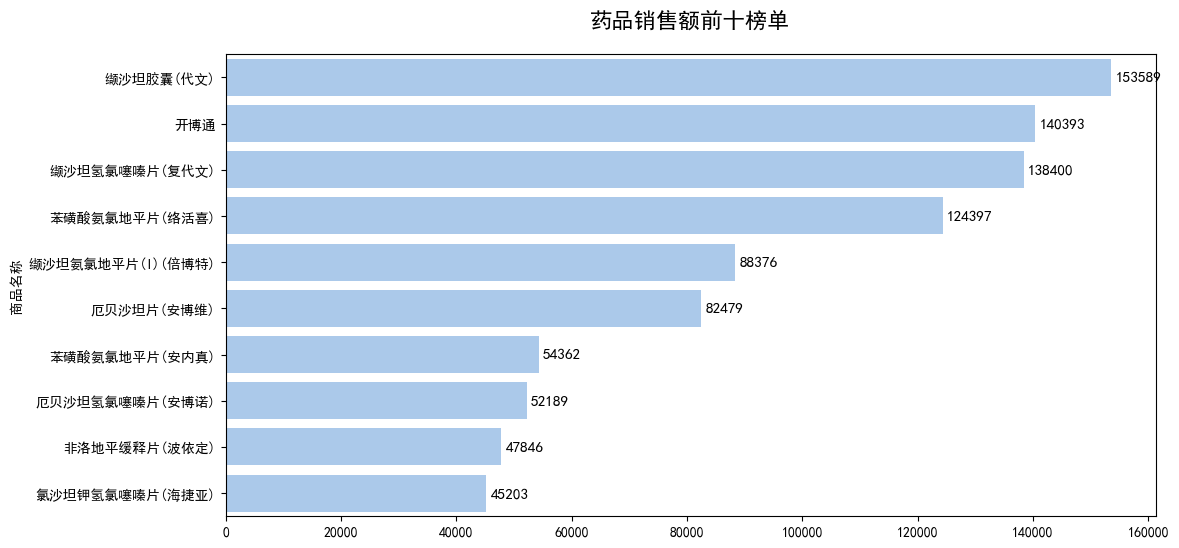

In [29]:
top_10_price = df_2.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_price.values,y=top_10_price.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=11, padding=3)
plt.title('药品销售额前十榜单', fontsize=16, pad=20)
plt.show()

#### 折扣力度最强药品前十榜单

In [30]:
cleaned['discount'] = cleaned['实收金额']/cleaned['应收金额']
cleaned.head()

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期,星期,购药日,购药月,实际销售额,discount
0,1616528.0,236701.0,强力VC银翘片,6,82.8,69.00,2016-01-01,星期五,1,1,414.00,0.833333
1,1616528.0,236701.0,清热解毒口服液,1,28.0,24.64,2016-01-02,星期六,2,1,24.64,0.880000
2,12602828.0,236701.0,感康,2,16.8,15.00,2016-01-06,星期三,6,1,30.00,0.892857
3,10070343428.0,236701.0,三九感冒灵,1,28.0,28.00,2016-01-11,星期一,11,1,28.00,1.000000
4,101554328.0,236701.0,三九感冒灵,8,224.0,208.00,2016-01-15,星期五,15,1,1664.00,0.928571


In [31]:
discount_by_drug = cleaned.groupby('商品名称')['discount'].mean().sort_values()
top10_discount = discount_by_drug.head(10)
top10_discount

商品名称
D替格瑞洛片              0.728000
苯磺酸氨氯地平片(兰迪)        0.781566
苯磺酸氨氯地平片(安内真)       0.840600
硝苯地平控释片(欣然)         0.842557
G厄贝沙坦分散片(6盒/疗程)     0.853333
硝苯地平片(心痛定)          0.862257
D苯磺酸氨氯地平胶囊(丽珠优可)    0.880000
尼群地平片               0.881313
氨加黄敏胶囊              0.885961
醒脑降压丸               0.886357
Name: discount, dtype: float64

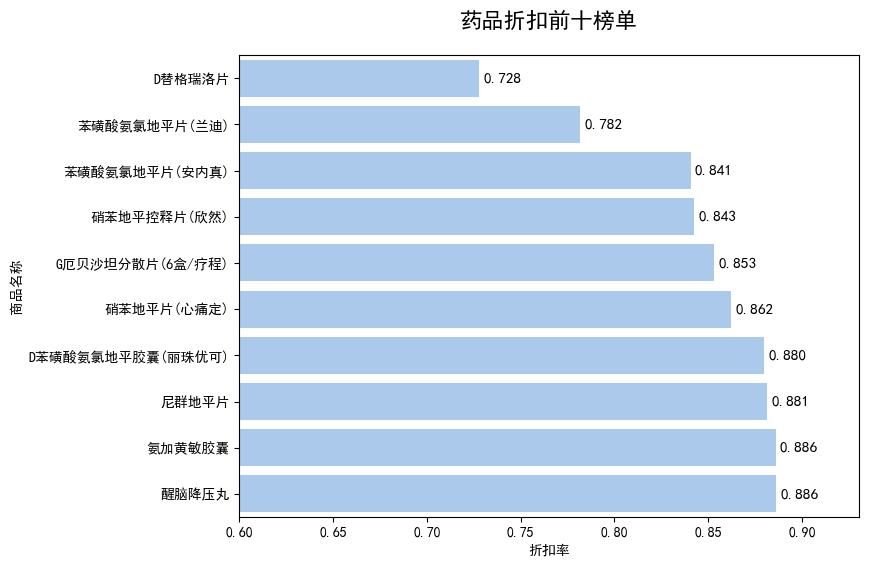

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top10_discount.values,y=top10_discount.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=11, padding=3)
plt.title('药品折扣前十榜单', fontsize=16, pad=20)
plt.xlabel('折扣率')
plt.xlim(left=0.6)
plt.show()

根据上述三个图表可以得出以下结论：
- 颉沙坦胶囊在药品销量榜排名第七，但由于其价格较贵，在销售额榜单中位列第一。
- 安内真销量最高，但是单价较低，在销售额榜单上排名第六。且其折扣力度在所有药品中排名第三。
- D替格瑞洛片和兰迪曾打下很低的折扣率。可能由于其销量和销售额都表现一般的原因。
- 开博通销量和销售额均位列第二，属于畅销药品。